In [ ]:
using Pkg
pkg"activate ."

In [ ]:
# Run this cell in order to download all the package dependencies with the exact versions used in the book
# This is necessary if (some of) the packages have been updated and have introduced breaking changes
pkg"instantiate"

In [1]:
using DelimitedFiles

In [13]:
movies = readdlm("top_10_movies.tsv", '\t', skipstart=1)

10×9 Array{Any,2}:
 "Moonlight (2016)"                   0  0  0  1  0  0  0  0
 "Zootopia (2016)"                    1  1  1  0  0  0  0  0
 "Arrival (2016)"                     0  0  0  1  0  1  0  1
 "Hell or High Water (2016)"          0  0  0  1  0  1  0  0
 "La La Land (2016)"                  0  0  1  1  0  0  1  0
 "The Jungle Book (2016)"             1  0  0  0  1  0  0  0
 "Manchester by the Sea (2016)"       0  0  0  1  0  0  0  0
 "Finding Dory (2016)"                0  1  0  0  0  0  0  0
 "Captain America: Civil War (2016)"  1  0  0  0  0  0  0  1
 "Moana (2016)"                       1  1  0  0  0  0  0  0

In [7]:
nemo = ["Finding Nemo (2003)", 0, 1, 1, 0, 1, 0, 0, 0]

9-element Array{Any,1}:
  "Finding Nemo (2003)"
 0                     
 1                     
 1                     
 0                     
 1                     
 0                     
 0                     
 0                     

In [2]:
using Pkg
pkg"add Distances"

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...===============>]  100.0 %.0 %
 Installed IntervalSets ─ v0.3.1
 Installed Lazy ───────── v0.13.2
 Installed StaticArrays ─ v0.9.2
 Installed Colors ─────── v0.9.5
  Updating `~/.julia/environments/v1.0/Project.toml`
  [b4f34e82] + Distances v0.7.3
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [5ae59095] ↑ Colors v0.9.4 ⇒ v0.9.5
  [8197267c] ↑ IntervalSets v0.3.0 ⇒ v0.3.1
  [50d2b5c4] ↑ Lazy v0.13.1 ⇒ v0.13.2
  [90137ffa] ↑ StaticArrays v0.9.1 ⇒ v0.9.2


In [19]:
using Distances

In [11]:
distances = Dict{String,Int}()

Dict{String,Int64} with 0 entries

In [26]:
for i in 1:size(movies, 1)
    distances[movies[i,:][1]] =  hamming(Int[movies[i,2:end]...], Int[nemo[2:end]...])
end

In [27]:
distances

Dict{String,Int64} with 10 entries:
  "The Jungle Book (2016)"            => 3
  "Hell or High Water (2016)"         => 5
  "Arrival (2016)"                    => 6
  "La La Land (2016)"                 => 4
  "Moana (2016)"                      => 3
  "Captain America: Civil War (2016)" => 5
  "Moonlight (2016)"                  => 4
  "Finding Dory (2016)"               => 2
  "Zootopia (2016)"                   => 2
  "Manchester by the Sea (2016)"      => 4

In [6]:
movies = readdlm("top_10_movies_user_rankings.csv", ';')

11×9 Array{Any,2}:
 "Movie title"                        …   "Missie"    "Musk"    "Sam"
 "Moonlight (2016)"                      9           2          ""   
 "Zootopia (2016)"                        ""         5          ""   
 "Arrival (2016)"                        9            ""      10     
 "Hell or High Water (2016)"             8            ""        ""   
 "La La Land (2016)"                  …   ""        10          ""   
 "The Jungle Book (2016)"                 ""         6          ""   
 "Manchester by the Sea (2016)"           ""          ""        ""   
 "Finding Dory (2016)"                    ""          ""        ""   
 "Captain America: Civil War (2016)"      ""          ""       9     
 "Moana (2016)"                       …   ""         7          ""   

In [9]:
pkg"add DataFrames CSV"
using CSV, DataFrames

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


┌ Info: Recompiling stale cache file /Users/adrian/.julia/compiled/v1.0/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1187


In [34]:
movies = CSV.read("top_10_movies_user_rankings.csv", delim = ';')

,Movie title,Acton,Annie,Comey,Dean,Kit,Missie,Musk,Sam
,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,Moonlight (2016),missing,3,missing,10,missing,9,2,missing
2,Zootopia (2016),9,10,7,missing,10,missing,5,missing
3,Arrival (2016),5,missing,6,10,missing,9,missing,10
4,Hell or High Water (2016),3,missing,3,10,missing,8,missing,missing
5,La La Land (2016),6,missing,8,9,missing,missing,10,missing
6,The Jungle Book (2016),8,7,missing,2,9,missing,6,missing
7,Manchester by the Sea (2016),missing,missing,2,8,missing,missing,missing,missing
8,Finding Dory (2016),7,8,5,4,10,missing,missing,missing
9,Captain America: Civil War (2016),10,missing,5,6,missing,missing,missing,9


In [11]:
describe(movies)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,Movie title,,Arrival (2016),,Zootopia (2016),10,0,String
2,Acton,7.0,3,7.5,10,,2,Int64
3,Annie,7.4,3,8.0,10,,5,Int64
4,Comey,5.14286,2,5.0,8,,3,Int64
5,Dean,7.375,2,8.5,10,,2,Int64
6,Kit,9.75,9,10.0,10,,6,Int64
7,Missie,8.66667,8,9.0,9,,7,Int64
8,Musk,6.0,2,6.0,10,,5,Int64
9,Sam,9.5,9,9.5,10,,8,Int64


In [17]:
movies[1,2]

missing

In [14]:
ismissing(movies[1, 2])

true

In [44]:
for c in names(movies)[2:end]
    movies[ismissing.(movies[c]), c] = 0
end

In [45]:
movies

,Movie title,Acton,Annie,Comey,Dean,Kit,Missie,Musk,Sam
,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,Moonlight (2016),0,3,0,10,0,9,2,0
2,Zootopia (2016),9,10,7,0,10,0,5,0
3,Arrival (2016),5,0,6,10,0,9,0,10
4,Hell or High Water (2016),3,0,3,10,0,8,0,0
5,La La Land (2016),6,0,8,9,0,0,10,0
6,The Jungle Book (2016),8,7,0,2,9,0,6,0
7,Manchester by the Sea (2016),0,0,2,8,0,0,0,0
8,Finding Dory (2016),7,8,5,4,10,0,0,0
9,Captain America: Civil War (2016),10,0,5,6,0,0,0,9


In [47]:
CSV.write("top_10_movies_user_rankings.tsv", movies, delim='\t')

"top_10_movies_user_rankings.tsv"

In [50]:
acton_and_annie = movies[:, 1:3]

┌ Warning: indexing with colon as row will create a copy in the future use df[col_inds] to get the columns without copying
│   caller = top-level scope at In[50]:1
└ @ Core In[50]:1


,Movie title,Acton,Annie
,String⍰,Int64⍰,Int64⍰
1,Moonlight (2016),0,3
2,Zootopia (2016),9,10
3,Arrival (2016),5,0
4,Hell or High Water (2016),3,0
5,La La Land (2016),6,0
6,The Jungle Book (2016),8,7
7,Manchester by the Sea (2016),0,0
8,Finding Dory (2016),7,8
9,Captain America: Civil War (2016),10,0


In [51]:
acton_and_annie_in_common = acton_and_annie[(acton_and_annie[:Acton] .> 0) .& (acton_and_annie[:Annie] .> 0), :]

,Movie title,Acton,Annie
,String⍰,Int64⍰,Int64⍰
1,Zootopia (2016),9,10
2,The Jungle Book (2016),8,7
3,Finding Dory (2016),7,8
4,Moana (2016),8,9


In [52]:
acton_and_annie[:Acton] .> 0

10-element BitArray{1}:
 false
  true
  true
  true
  true
  true
 false
  true
  true
  true

In [53]:
acton_and_annie[:Annie] .> 0

10-element BitArray{1}:
  true
  true
 false
 false
 false
  true
 false
  true
 false
  true

In [55]:
(acton_and_annie[:Acton] .> 0) .& (acton_and_annie[:Annie] .> 0)

10-element BitArray{1}:
 false
  true
 false
 false
 false
  true
 false
  true
 false
  true

In [56]:
pkg"add Plots"
using Plots

 Resolving package versions...
 Installed PlotThemes ── v0.3.0
 Installed RecipesBase ─ v0.6.0
 Installed Plots ─────── v0.21.0
 Installed PlotUtils ─── v0.5.5
 Installed GR ────────── v0.35.0
  Updating `~/.julia/environments/v1.0/Project.toml`
  [91a5bcdd] + Plots v0.21.0
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [28b8d3ca] + GR v0.35.0
  [ccf2f8ad] + PlotThemes v0.3.0
  [995b91a9] + PlotUtils v0.5.5
  [91a5bcdd] + Plots v0.21.0
  [3cdcf5f2] + RecipesBase v0.6.0
  Building GR ───→ `~/.julia/packages/GR/k8wwU/deps/build.log`
  Building Plots → `~/.julia/packages/Plots/rmogG/deps/build.log`


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1189


┌ Warning: indexing with colon as row will create a copy in the future use df[col_inds] to get the columns without copying
│   caller = top-level scope at In[59]:1
└ @ Core In[59]:1
┌ Warning: indexing with colon as row will create a copy in the future use df[col_inds] to get the columns without copying
│   caller = top-level scope at In[59]:1
└ @ Core In[59]:1


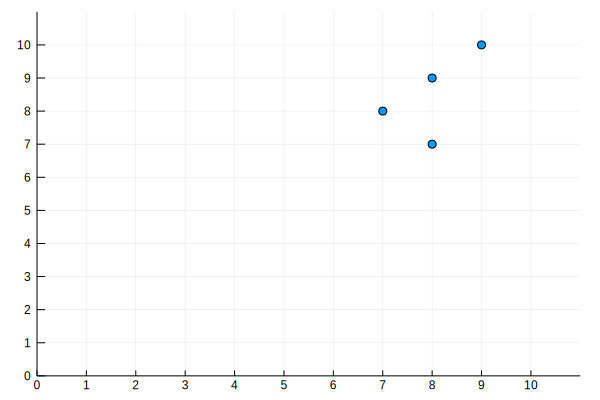

In [59]:
plot(acton_and_annie_in_common[:,2], acton_and_annie_in_common[:,3], seriestype=:scatter, xticks=0:10, yticks=0:10, lims=(0,11), label="")

In [60]:
pkg"add StatPlots"
using StatPlots

 Resolving package versions...
 Installed StatPlots ──────── v0.8.1
 Installed NearestNeighbors ─ v0.4.2
 Installed Clustering ─────── v0.12.1
  Updating `~/.julia/environments/v1.0/Project.toml`
  [60ddc479] + StatPlots v0.8.1
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [aaaa29a8] + Clustering v0.12.1
  [e7dc6d0d] + DataValues v0.4.5
  [1c8ee90f] + IterableTables v0.9.0
  [b8a86587] + NearestNeighbors v0.4.2
  [60ddc479] + StatPlots v0.8.1
  [382cd787] + TableTraitsUtils v0.3.1


┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1189
┌ Info: Recompiling stale cache file /Users/adrian/.julia/compiled/v1.0/Distributions/xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1187
┌ Info: Precompiling Widgets [cc8bc4a8-27d6-5769-a93b-9d913e69aa62]
└ @ Base loading.jl:1189
┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1189
┌ Info: Recompiling stale cache file /Users/adrian/.julia/compiled/v1.0/KernelDensity/4QyGx.ji for KernelDensity [5ab0869b-81aa-558d-bb23-cbf5423bbe9b]
└ @ Base loading.jl:1187


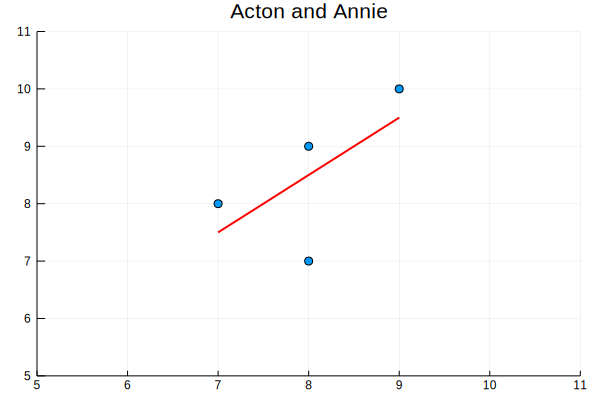

In [61]:
@df acton_and_annie_in_common scatter([:Acton], [:Annie], smooth = true, line = :red, linewidth = 2, title = "Acton and Annie", legend = false, xlimits = (5, 11), ylimits = (5, 11))

In [66]:
using Statistics
cor(acton_and_annie_in_common[:Acton], acton_and_annie_in_common[:Annie])

0.6324555320336759

In [67]:
annies_recommendations = acton_and_annie[(acton_and_annie[:Annie] .== 0) .& (acton_and_annie[:Acton] .> 0), :]

,Movie title,Acton,Annie
,String⍰,Int64⍰,Int64⍰
1,Arrival (2016),5,0
2,Hell or High Water (2016),3,0
3,La La Land (2016),6,0
4,Captain America: Civil War (2016),10,0


In [68]:
movies[:, [Symbol("Movie title"), :Dean, :Kit]]

┌ Warning: indexing with colon as row will create a copy in the future use df[col_inds] to get the columns without copying
│   caller = top-level scope at In[68]:1
└ @ Core In[68]:1


,Movie title,Dean,Kit
,String⍰,Int64⍰,Int64⍰
1,Moonlight (2016),10,0
2,Zootopia (2016),0,10
3,Arrival (2016),10,0
4,Hell or High Water (2016),10,0
5,La La Land (2016),9,0
6,The Jungle Book (2016),2,9
7,Manchester by the Sea (2016),8,0
8,Finding Dory (2016),4,10
9,Captain America: Civil War (2016),6,0
